In [20]:
# BASICS
# from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# HELPER FUNCTIONS
# import my_resample as ms
import src.my_functions as mf

# METRICS
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# CLASSIFIERS
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

# GRID SEARCHING
from sklearn.model_selection import RandomizedSearchCV

# WARNINGS
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [3]:
X_train, X_test, y_train, y_test, cols = mf.load_arrays(scale = True, classification = False)

# Random Forest Regressor

In [7]:
# Grid
random_forest_grid={
    "n_estimators": range(5, 20),
    "max_features": [.6, .7, .8, .9], 
    "max_depth": np.arange(11, 17, 1),
    "min_samples_split": np.arange(2, 20),
    "min_samples_leaf": (1, 5),
    "max_leaf_nodes": np.arange(200, 600, 10),
    "min_impurity_decrease": np.arange(0, .0001, .00001),
}

In [10]:
%%time

# Grid Search
rfc = RandomForestRegressor()
rf_model = RandomizedSearchCV(rfc, 
                              param_distributions=random_forest_grid, 
#                               scoring='f1', 
                              n_iter=100)
rf_model.fit(X_train, y_train)

CPU times: user 3min 59s, sys: 2.08 s, total: 4min 1s
Wall time: 4min 11s


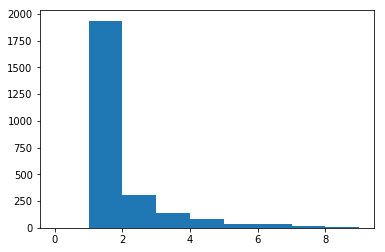

In [29]:
# Predict
y_pred = rf_model.predict(X_test)
plt.hist(y_pred, bins=range(10))
plt.show()

In [30]:
y_pred

array([ 1.38623865,  2.21558954,  1.6623439 , ...,  1.56560113,
        1.16463702,  1.04969347])

0.171745152355


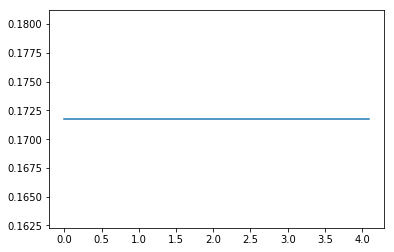

In [31]:
# for x in np.arange(.1, 5, .2):
#     y_pred_binary = mf.convert_to_binary(y_pred, x)
#     y_test_binary = mf.convert_to_binary(y_test, x)
#     print(precision_score(y_pred_binary, y_test_binary),
#          recall_score(y_pred_binary, y_test_binary),
#          f1_score(y_pred_binary, y_test_binary))
    
y_test_binary = mf.convert_to_binary(y_test)

f1 = []
precision = []
recall = []
for cutoff in np.arange(0, 4.1, .01):
    y_pred_binary = mf.convert_to_binary(y_pred, x)
    f1.append(f1_score(y_test_binary, y_pred_binary))
    precision.append(precision_score(y_test_binary, y_pred_binary))
    recall.append(recall_score(y_test_binary, y_pred_binary))
        
print(max(f1))
plt.plot(np.arange(0, 4.1, .01), f1)
plt.show()

In [37]:
sum(y_test_binary)/len(y_test_binary)

0.10160218835482611